# QLD traffic API

***
Public API Key: 3e83add325cbb69ac4d8e5bf433d770b
* Limited to 100 requests per minute

<br>
List of API URL's:

* https://api.qldtraffic.qld.gov.au/v1/webcams 
* https://api.qldtraffic.qld.gov.au/v1/highriskcrashzones  
* https://api.qldtraffic.qld.gov.au/v2/events 

<br> 
Full documentation:
* https://qldtraffic.qld.gov.au/media/more/qldtraffic-website-api-specification-V1-2.pdf?lang=en-AU
  

In [1]:
import pandas as pd
import requests

In [2]:
api_key = '?apikey=3e83add325cbb69ac4d8e5bf433d770b'
types = ['v1/webcams','v1/highriskcrashzones','v2/events']

### Webcam data

In [3]:
url = 'https://api.qldtraffic.qld.gov.au/'+types[0]+api_key
r = requests.get(url).json()
r.keys()

dict_keys(['type', 'features', 'published', 'rights'])

You extract a series of webcams, along with their coordinates and other details:

In [4]:
len(r['features'])

173

In [5]:
r['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [153.0086975, -27.5551796]},
 'properties': {'id': 1,
  'url': 'https://api.qldtraffic.qld.gov.au/v1/webcams/1',
  'description': 'Archerfield - Ipswich Mwy - North',
  'direction': 'NorthEast',
  'district': 'Metropolitan',
  'locality': 'Archerfield',
  'postcode': '4108',
  'image_url': 'https://webcams.qldtraffic.qld.gov.au/Metropolitan/Archerfield_Ipswich_Mwy_sth.jpg',
  'image_sourced_from': None,
  'isCustom': False}}

For each, you can go to the URL of its latest image:

In [6]:
img_url = r['features'][0]['properties']['image_url']
r_img = requests.get(img_url)

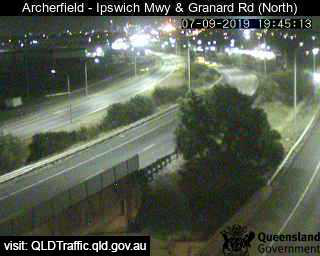

In [7]:
from PIL import Image
from io import BytesIO
img = Image.open(BytesIO(r_img.content))
img

### High Risk Crash Zones

In [8]:
url = 'https://api.qldtraffic.qld.gov.au/'+types[1]+api_key
r = requests.get(url).json()
r.keys()

dict_keys(['name', 'type', 'crs', 'features', 'published', 'rights'])

You get a list of the high-risk crash zones:

In [9]:
r['name']

'Top_26'

In [10]:
len(r['features'])

26

Each of these will come with a set of coordinates that outline the high-risk crash zone:

In [11]:
r['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [12]:
r['features'][0]['geometry']['coordinates'][0][:10]

[[153.304967, -27.650293996],
 [153.305184, -27.649339996],
 [153.305243, -27.649060996],
 [153.305269, -27.648925],
 [153.30529, -27.648796],
 [153.305308, -27.648661],
 [153.305321, -27.648529],
 [153.305331, -27.648397996],
 [153.305337, -27.648262996],
 [153.305338, -27.648123004]]

### Events

In [13]:
url = 'https://api.qldtraffic.qld.gov.au/'+types[2]+api_key
r = requests.get(url).json()
r.keys()

dict_keys(['type', 'features', 'published', 'rights'])

Extracts a series of road events in QLD:

In [14]:
len(r['features'])

276

In [15]:
r['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

Again, you get a set of co-ordinates that define the area for the event:

In [16]:
r['features'][0]['geometry']['coordinates'][0][:10]

[[148.9395348, -21.3292286],
 [148.93963, -21.33001],
 [148.93969, -21.3303],
 [148.94012, -21.33247],
 [148.94039, -21.33365],
 [148.9404, -21.33369],
 [148.94053, -21.33434],
 [148.94057, -21.33464],
 [148.94057, -21.33474],
 [148.94056, -21.33483]]

You also get a fair bit of info about the event:

In [17]:
r['features'][0]['properties']

{'id': 2301,
 'area_alert': False,
 'status': 'Published',
 'published': '2016-08-25T14:24:00+10:00',
 'source': {'source_name': 'EPS',
  'source_id': None,
  'account': None,
  'provided_by': 'Department of Transport and Main Roads',
  'provided_by_url': 'https://qldtraffic.qld.gov.au'},
 'url': 'https://api.qldtraffic.qld.gov.au/v2/events/2301',
 'event_type': 'Roadworks',
 'event_subtype': 'Planned roadworks',
 'event_due_to': None,
 'impact': {'direction': 'Both directions',
  'towards': None,
  'impact_type': 'No blockage',
  'impact_subtype': None,
  'delay': 'Delays expected (during active hours)'},
 'duration': {'start': '2016-04-04T08:00:00+10:00',
  'end': '2019-11-30T18:00:00+10:00',
  'active_days': None,
  'recurrences': None},
 'event_priority': 'Medium',
 'description': 'Construction - Eton Range Realignment Project',
 'advice': 'Allow extra travel time',
 'information': 'Operators of vehicles over 7.9m wide need to call the project site at least 5 days prior to travelli